In [2]:
import pandas as pd
import numpy as np

In [3]:
df= pd.read_csv('C:/Users/rgangurde/Documents/ddt217.csv')

In [4]:
df.head()

,Date_Time,Segment_ID,UTC_Date_Time,Speed_miles_hour_,Hist_Av_Speed_miles_hour_,Ref_Speed_miles_hour_,Travel_Time_Minutes_,CValue,Pct_Score30,Pct_Score20,Pct_Score10,Road_Closure
0,2017-02-22 11:55:00.000,1187531710,2017-02-22 11:55:00.000,24.0,21.0,24.0,1.28,100.0,100.0,0.0,0.0,F
1,2017-02-22 12:00:00.000,1187531710,2017-02-22 12:00:00.000,21.0,20.0,24.0,1.45,100.0,100.0,0.0,0.0,F
2,2017-02-22 12:05:00.000,1187531710,2017-02-22 12:05:00.000,26.0,20.0,24.0,1.20,100.0,100.0,0.0,0.0,F
3,2017-02-22 12:10:00.000,1187531710,2017-02-22 12:10:00.000,27.0,20.0,24.0,1.12,100.0,100.0,0.0,0.0,F
4,2017-02-22 12:15:00.000,1187531710,2017-02-22 12:15:00.000,27.0,20.0,24.0,1.12,100.0,100.0,0.0,0.0,F


In [8]:
df.dtypes

Date_Time                     object
Segment_ID                     int64
UTC_Date_Time                 object
Speed_miles_hour_            float64
Hist_Av_Speed_miles_hour_    float64
Ref_Speed_miles_hour_        float64
Travel_Time_Minutes_         float64
CValue                       float64
Pct_Score30                  float64
Pct_Score20                  float64
Pct_Score10                  float64
Road_Closure                  object
dtype: object

In [9]:
def segmentAvg (segID):
    segSum= float(0)
    segCount= 0
    for i in range(len(df)):
        if df['Segment_ID'][i] == segID:
            segSum= segSum + df['Speed_miles_hour_'][i]
            segCount+= 1
    
    avg_= segSum / segCount
    print('Average Speed mph for segment', segID, ' is',avg_)

In [10]:
segmentAvg(1187531710)


Average Speed mph for segment 1187531710  is 20.744099953725126


In [13]:
X_= df[['Speed_miles_hour_','Hist_Av_Speed_miles_hour_','Ref_Speed_miles_hour_', 'Travel_Time_Minutes_', 'CValue', 'Pct_Score30','Pct_Score20','Pct_Score10']].values

In [16]:
# X_= np.asarray(X_)
X_

array([[ 24.,  21.,  24., ..., 100.,   0.,   0.],
       [ 21.,  20.,  24., ..., 100.,   0.,   0.],
       [ 26.,  20.,  24., ..., 100.,   0.,   0.],
       ...,
       [ 69.,  60.,  60., ..., 100.,   0.,   0.],
       [ 58.,  61.,  60., ..., 100.,   0.,   0.],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])

In [14]:
X_.shape
# X_= X_.reshape(8725118,8)

(8725118, 8)

In [23]:
print(X_[0,1])
print(len(X_[:]))

21.0
8725118


In [18]:
avgHist_= np.nanmean(np.asanyarray(df['Hist_Av_Speed_miles_hour_']))
avgSpeed_= np.nanmean(np.asanyarray(df['Speed_miles_hour_']))
avgRef_= np.nanmean(np.asanyarray(df['Ref_Speed_miles_hour_']))
avgTime_= np.nanmean(np.asanyarray(df['Travel_Time_Minutes_']))
avgCval_= np.nanmean(np.asanyarray(df['CValue']))
avgPct30_= np.nanmean(np.asanyarray(df['Pct_Score30']))
avgPct20_= np.nanmean(np.asanyarray(df['Pct_Score20']))
avgPct10_= np.nanmean(np.asanyarray(df['Pct_Score10']))

avgTotal= (avgHist_+avgSpeed_+avgTime_+avgCval_+avgPct10_+avgPct20_+avgPct30_+avgRef_)/8

In [24]:
import math

for i in range(8725118):
       for j in range(len(X_[0,:])):
             if math.isnan(X_[i,j]):
                X_[i,j]= avgTotal

In [21]:
from sklearn.cluster import KMeans

model= KMeans(init= 'k-means++', n_clusters= 2, n_init= 5)

In [25]:
model.fit(X_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
labels= model.labels_

In [27]:
labels

array([0, 0, 0, ..., 1, 1, 0])

In [28]:
labels.shape

(8725118,)

In [29]:
df['Cluster']= labels

In [39]:
df.head()

,Date_Time,Segment_ID,UTC_Date_Time,Speed_miles_hour_,Hist_Av_Speed_miles_hour_,Ref_Speed_miles_hour_,Travel_Time_Minutes_,CValue,Pct_Score30,Pct_Score20,Pct_Score10,Road_Closure,Cluster
0,2017-02-22 11:55:00.000,1187531710,2017-02-22 11:55:00.000,24.0,21.0,24.0,1.28,100.0,100.0,0.0,0.0,F,0
1,2017-02-22 12:00:00.000,1187531710,2017-02-22 12:00:00.000,21.0,20.0,24.0,1.45,100.0,100.0,0.0,0.0,F,0
2,2017-02-22 12:05:00.000,1187531710,2017-02-22 12:05:00.000,26.0,20.0,24.0,1.20,100.0,100.0,0.0,0.0,F,0
3,2017-02-22 12:10:00.000,1187531710,2017-02-22 12:10:00.000,27.0,20.0,24.0,1.12,100.0,100.0,0.0,0.0,F,0
4,2017-02-22 12:15:00.000,1187531710,2017-02-22 12:15:00.000,27.0,20.0,24.0,1.12,100.0,100.0,0.0,0.0,F,0


Clusters have been created. Compare and contrast the clusters with the road closures

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline



valF_= pd.DataFrame(df[df['Road_Closure']=='F'])
valT_= pd.DataFrame(df[df['Road_Closure']== 'T'])

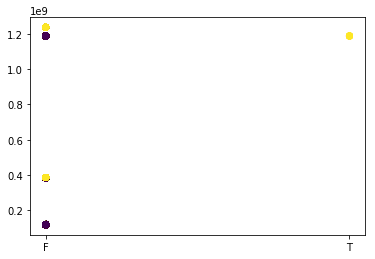

In [36]:
plt.scatter(x= df['Road_Closure'][:8725117], y= df['Segment_ID'][:8725117], c= labels[:8725117].astype('float'))

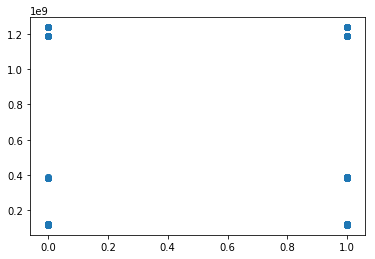

In [38]:
plt.scatter(x= df['Cluster'], y= df['Segment_ID'])

In [47]:
df.head()

,Date_Time,Segment_ID,UTC_Date_Time,Speed_miles_hour_,Hist_Av_Speed_miles_hour_,Ref_Speed_miles_hour_,Travel_Time_Minutes_,CValue,Pct_Score30,Pct_Score20,Pct_Score10,Road_Closure,Cluster
0,2017-02-22 11:55:00.000,1187531710,2017-02-22 11:55:00.000,24.0,21.0,24.0,1.28,100.0,100.0,0.0,0.0,F,0
1,2017-02-22 12:00:00.000,1187531710,2017-02-22 12:00:00.000,21.0,20.0,24.0,1.45,100.0,100.0,0.0,0.0,F,0
2,2017-02-22 12:05:00.000,1187531710,2017-02-22 12:05:00.000,26.0,20.0,24.0,1.20,100.0,100.0,0.0,0.0,F,0
3,2017-02-22 12:10:00.000,1187531710,2017-02-22 12:10:00.000,27.0,20.0,24.0,1.12,100.0,100.0,0.0,0.0,F,0
4,2017-02-22 12:15:00.000,1187531710,2017-02-22 12:15:00.000,27.0,20.0,24.0,1.12,100.0,100.0,0.0,0.0,F,0
